In [1]:
import torch
import higher
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as aio

In [45]:
HH = aio.loadmat('H.mat')['H']
H = torch.tensor(HH, dtype=torch.complex64)


In [49]:
H_abs = torch.abs(H)
H_abs.min()

tensor(7.9013e-05)

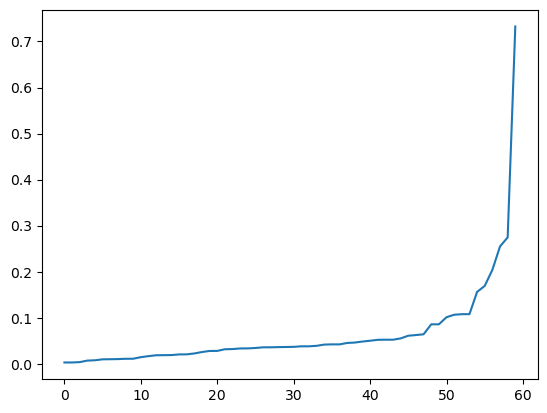

In [46]:
#get absolute value of complex of H
H_abs = torch.abs(H[:,:,0])
#lay lal value in a single dimensional array
H_abs = H_abs.flatten()
#sort the array
H_abs = torch.sort(H_abs).values
#plot the sorted array
plt.plot(H_abs)



In [47]:
H_abs

tensor([0.0029, 0.0029, 0.0036, 0.0070, 0.0076, 0.0097, 0.0099, 0.0102, 0.0109,
        0.0110, 0.0144, 0.0166, 0.0185, 0.0188, 0.0189, 0.0204, 0.0205, 0.0224,
        0.0256, 0.0279, 0.0280, 0.0316, 0.0320, 0.0333, 0.0335, 0.0343, 0.0358,
        0.0359, 0.0362, 0.0365, 0.0368, 0.0380, 0.0380, 0.0390, 0.0417, 0.0422,
        0.0422, 0.0453, 0.0462, 0.0483, 0.0501, 0.0521, 0.0523, 0.0523, 0.0552,
        0.0610, 0.0624, 0.0641, 0.0857, 0.0857, 0.1012, 0.1065, 0.1077, 0.1078,
        0.1561, 0.1692, 0.2040, 0.2549, 0.2745, 0.7326])

In [21]:

#choose a random number out of 1000 
t = torch.randint(0,1000,(1,))
H[:,:,t].shape


torch.Size([4, 2, 1])

In [27]:
k=2
N = 3200
y = torch.zeros(N)

y = torch.arange(N)%4

p = torch.zeros(N, dtype=torch.complex64)
p.real = torch.tile(torch.FloatTensor([-1,-1,1,1]), (N//4,1)).reshape(-1)
p.imag = torch.tile(torch.FloatTensor([-1,1,-1,1]), (N//4,1)).reshape(-1)
#identity matrix
HH = aio.loadmat('H.mat')['H']
H = torch.tensor(HH, dtype=torch.complex64)
Ml = H.shape[0]



t = torch.randint(0,1000,(1,))
h = torch.squeeze(H[:,:,t]).T
# change p vector to a random permutaion of itself
perm = torch.zeros(N, dtype=torch.int)
X = torch.zeros(N,k, dtype=torch.complex64)
labels = torch.zeros(N, k)
for i in range(k):
    perm = torch.randperm(N)
    X[:,i] = p[perm]
    labels[:,i] = y[perm]
#sample noise from a complex normal



In [35]:
y = X@h
noise = torch.randn(N, Ml, dtype=torch.complex64)
noise.shape

torch.Size([3200, 4])

In [41]:
noise = noise / torch.sqrt(torch.mean(torch.abs(noise)**2))
noise.mean()

tensor(0.0045-0.0161j)

In [44]:
dd = noise.real
dd.shape

torch.Size([3200, 4])